## Projeto final Ciência de Dados IA Generative Academy
### IMDB
Inicialmente, com base no arquivo.db, foi criado o arquivo em sqlite através do comanto "sqlite3 sqliteimdbdb.db < IMDBdatasetimport.sql".
Antes da execução do comando, alguns comandos em SQL foram alterados por não serem suportados por sqlite.
Abaixo, segue a conexão, carga em memória e uma query para demonstração.

In [1894]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Specify the path to your SQL file
sql_file_path = 'IMDBdatasetimport.sql'

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Create a cursor object
cursor = conn.cursor()

# Open the SQL file and read its contents
with open(sql_file_path, 'r') as sql_file:
    sql_script = sql_file.read()

# Execute the SQL script
cursor.executescript(sql_script)

# Example query to fetch data
cursor.execute("SELECT * FROM movie LIMIT 10;")
rows = cursor.fetchall()

# Print the first 10 rows of the 'movie' table
for row in rows:
    print(row)



('tt0012494', 'Der müde Tod', 2017, '2017-06-09', 97, 'Germany', '$ 12156', 'German', 'Decla-Bioscop AG')
('tt0038733', 'A Matter of Life and Death', 2017, '2017-12-08', 104, 'UK', '$ 124241', 'English, French, Russian', 'The Archers')
('tt0361953', 'The Nest of the Cuckoo Birds', 2017, '2017-10-16', 81, 'USA', None, 'English', 'Bert Williams Motion Pictures and Distributor')
('tt0235166', 'Against All Hope', 2017, '2017-10-20', 90, 'USA', None, 'English', None)
('tt0337383', 'Vaikai is Amerikos viesbucio', 2017, '2017-03-09', 88, 'Soviet Union', None, 'Lithuanian, Russian', 'Lietuvos Kinostudija')
('tt0116851', 'Leila', 2017, '2017-12-06', 102, 'Iran', '$ 8231', 'Persian', 'Farabi Cinema Foundation')
('tt0493407', 'Cook Off!', 2017, '2017-11-17', 98, 'USA', None, 'English', None)
('tt0443474', 'Crazy', 2017, '2017-01-19', 106, 'USA', None, 'English', 'FN Crazy Film LLC')
('tt0499469', 'Emilio', 2017, '2017-02-17', 102, 'USA', None, 'English, Spanish', 'Emilio Productions')
('tt0915458

### União das tabelas em um único dataframe

In [1895]:
from sqlalchemy import create_engine

engine = create_engine("sqlite:///sqliteimdbdb.db")

if(engine):
    print("Connection Successful")
# Read the data from the 'movie' table

movie_df = pd.read_sql_table('movie', engine)

# Now Genres
genre_df = pd.read_sql_table('genre', engine)

# director_mapping table
director_mapping_df = pd.read_sql_table('director_mapping', engine)

# role_mapping
role_mapping_df = pd.read_sql_table('role_mapping', engine)

# names
names_df = pd.read_sql_table('names', engine)

# ratings
ratings_df = pd.read_sql_table('ratings', engine)



director_mapping_df.shape

Connection Successful


(3867, 2)

### Visualizando as tabelas para entendê-las

In [1896]:
movie_df 

,id,title,year,date_published,duration,country,worlwide_gross_income,languages,production_company
0,tt0012494,Der müde Tod,2017,2017-06-09,97,Germany,$ 12156,German,Decla-Bioscop AG
1,tt0038733,A Matter of Life and Death,2017,2017-12-08,104,UK,$ 124241,"English, French, Russian",The Archers
2,tt0361953,The Nest of the Cuckoo Birds,2017,2017-10-16,81,USA,None,English,Bert Williams Motion Pictures and Distributor
3,tt0235166,Against All Hope,2017,2017-10-20,90,USA,None,English,None
4,tt0337383,Vaikai is Amerikos viesbucio,2017,2017-03-09,88,Soviet Union,None,"Lithuanian, Russian",Lietuvos Kinostudija
...,...,...,...,...,...,...,...,...,...
7992,tt9903716,Jessie,2019,2019-03-15,106,India,None,Telugu,Ekaa Art Production
7993,tt9905412,Ottam,2019,2019-03-08,120,India,$ 4791,Malayalam,Thomas Thiruvalla Films
7994,tt9905462,Pengalila,2019,2019-03-08,111,India,None,Malayalam,Benzy Productions
7995,tt9911774,Padmavyuhathile Abhimanyu,2019,2019-03-08,130,India,None,Malayalam,RMCC Productions


In [1897]:
movie_df["country"].isnull().sum()

np.int64(20)

In [1898]:
genre_df

,movie_id,genre
0,tt0012494,Thriller
1,tt0012494,Fantasy
2,tt0012494,Drama
3,tt0038733,Fantasy
4,tt0038733,Drama
...,...,...
14657,tt9905412,Drama
14658,tt9905462,Drama
14659,tt9911774,Drama
14660,tt9914286,Family


In [1899]:
director_mapping_df 

,movie_id,name_id
0,tt0038733,nm0003836
1,tt0038733,nm0696247
2,tt0060908,nm0003606
3,tt0069049,nm0000080
4,tt0082620,nm0716460
...,...,...
3862,tt9894394,nm10529303
3863,tt9894394,nm10529305
3864,tt9894394,nm10529304
3865,tt9899880,nm5971240


In [1900]:
role_mapping_df

,movie_id,name_id,category
0,tt0038733,nm0000057,actor
1,tt0038733,nm0001375,actress
2,tt0038733,nm0178509,actor
3,tt0038733,nm0126402,actress
4,tt0060908,nm0000869,actor
...,...,...,...
15610,tt9899880,nm2544899,actress
15611,tt9903716,nm10592896,actress
15612,tt9903716,nm7237124,actress
15613,tt9903716,nm5118890,actor


In [1901]:
names_df

,id,name,height,date_of_birth,known_for_movies
0,nm0000002,Lauren Bacall,174.0,1924-09-16,None
1,nm0000110,Kenneth Branagh,177.0,1960-12-10,tt3402236
2,nm0000009,Richard Burton,175.0,1925-11-10,None
3,nm0000114,Steve Buscemi,175.0,1957-12-13,tt4686844
4,nm0000014,Olivia de Havilland,163.0,1916-07-01,None
...,...,...,...,...,...
25730,nm9988815,Nat Kitcharit,NaN,NaT,tt8733014
25731,nm9988816,Warisara Yu,NaN,NaT,tt8733014
25732,nm9988817,Apiwich Reardon,NaN,NaT,tt8733014
25733,nm9991000,Divyansha Kaushik,NaN,NaT,tt8737614


In [1902]:
ratings_df

,movie_id,avg_rating,total_votes,median_rating
0,tt0012494,7.7,4695,8
1,tt0038733,8.1,17693,8
2,tt0060908,7.5,3392,8
3,tt0069049,6.9,5014,7
4,tt0071145,8.2,789,8
...,...,...,...,...
7992,tt9903716,7.2,219,9
7993,tt9905412,7.8,510,9
7994,tt9905462,8.4,604,9
7995,tt9911774,8.4,369,9


### Continuação para unir o dataframe com alguns tratamentos necessários

In [1903]:
## Movie Data with Ratings Data
# Começando a unir os dataframes
movie_with_ratings_df = pd.merge(movie_df, ratings_df, left_on="id", right_on="movie_id", how="left")
movie_with_ratings_df

,id,title,year,date_published,duration,country,worlwide_gross_income,languages,production_company,movie_id,avg_rating,total_votes,median_rating
0,tt0012494,Der müde Tod,2017,2017-06-09,97,Germany,$ 12156,German,Decla-Bioscop AG,tt0012494,7.7,4695,8
1,tt0038733,A Matter of Life and Death,2017,2017-12-08,104,UK,$ 124241,"English, French, Russian",The Archers,tt0038733,8.1,17693,8
2,tt0361953,The Nest of the Cuckoo Birds,2017,2017-10-16,81,USA,None,English,Bert Williams Motion Pictures and Distributor,tt0361953,5.1,220,5
3,tt0235166,Against All Hope,2017,2017-10-20,90,USA,None,English,None,tt0235166,3.6,145,4
4,tt0337383,Vaikai is Amerikos viesbucio,2017,2017-03-09,88,Soviet Union,None,"Lithuanian, Russian",Lietuvos Kinostudija,tt0337383,8.2,493,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,tt9903716,Jessie,2019,2019-03-15,106,India,None,Telugu,Ekaa Art Production,tt9903716,7.2,219,9
7993,tt9905412,Ottam,2019,2019-03-08,120,India,$ 4791,Malayalam,Thomas Thiruvalla Films,tt9905412,7.8,510,9
7994,tt9905462,Pengalila,2019,2019-03-08,111,India,None,Malayalam,Benzy Productions,tt9905462,8.4,604,9
7995,tt9911774,Padmavyuhathile Abhimanyu,2019,2019-03-08,130,India,None,Malayalam,RMCC Productions,tt9911774,8.4,369,9


In [1904]:
movie_df.shape

(7997, 9)

In [1905]:
## adding the genres in the dataset of the movies wirh ratings
# I need to change the genres dataframe, because otherwise the lines of the movie will be replicated once for each genre
# So first I change the dataset to link one movie_id to a list of genres

aggregated_genres_df = genre_df.groupby('movie_id')['genre'].apply(list).reset_index()
#movie_with_ratings_and_genres_df
aggregated_genres_df

,movie_id,genre
0,tt0012494,"[Thriller, Fantasy, Drama]"
1,tt0038733,"[Fantasy, Drama, Comedy]"
2,tt0060908,"[Comedy, Drama]"
3,tt0069049,[Drama]
4,tt0071145,[Drama]
...,...,...
7992,tt9903716,"[Thriller, Horror]"
7993,tt9905412,[Drama]
7994,tt9905462,[Drama]
7995,tt9911774,[Drama]


In [1906]:
# Now, adding the genres to the movie_with_ratings_df

movie_with_ratings_and_genres_df = pd.merge(movie_with_ratings_df, aggregated_genres_df, on="movie_id", how="left")
movie_with_ratings_and_genres_df

,id,title,year,date_published,duration,country,worlwide_gross_income,languages,production_company,movie_id,avg_rating,total_votes,median_rating,genre
0,tt0012494,Der müde Tod,2017,2017-06-09,97,Germany,$ 12156,German,Decla-Bioscop AG,tt0012494,7.7,4695,8,"[Thriller, Fantasy, Drama]"
1,tt0038733,A Matter of Life and Death,2017,2017-12-08,104,UK,$ 124241,"English, French, Russian",The Archers,tt0038733,8.1,17693,8,"[Fantasy, Drama, Comedy]"
2,tt0361953,The Nest of the Cuckoo Birds,2017,2017-10-16,81,USA,None,English,Bert Williams Motion Pictures and Distributor,tt0361953,5.1,220,5,"[Horror, Drama]"
3,tt0235166,Against All Hope,2017,2017-10-20,90,USA,None,English,None,tt0235166,3.6,145,4,[Drama]
4,tt0337383,Vaikai is Amerikos viesbucio,2017,2017-03-09,88,Soviet Union,None,"Lithuanian, Russian",Lietuvos Kinostudija,tt0337383,8.2,493,9,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,tt9903716,Jessie,2019,2019-03-15,106,India,None,Telugu,Ekaa Art Production,tt9903716,7.2,219,9,"[Thriller, Horror]"
7993,tt9905412,Ottam,2019,2019-03-08,120,India,$ 4791,Malayalam,Thomas Thiruvalla Films,tt9905412,7.8,510,9,[Drama]
7994,tt9905462,Pengalila,2019,2019-03-08,111,India,None,Malayalam,Benzy Productions,tt9905462,8.4,604,9,[Drama]
7995,tt9911774,Padmavyuhathile Abhimanyu,2019,2019-03-08,130,India,None,Malayalam,RMCC Productions,tt9911774,8.4,369,9,[Drama]


In [1907]:
# removing the columns title, year, data_published, worldwide_gross_income, production_company, movie_id
movie_with_ratings_and_genres_df.drop(columns=["title","year","date_published","languages","worlwide_gross_income","production_company","movie_id","total_votes","median_rating"], inplace=True)
movie_with_ratings_and_genres_df

,id,duration,country,avg_rating,genre
0,tt0012494,97,Germany,7.7,"[Thriller, Fantasy, Drama]"
1,tt0038733,104,UK,8.1,"[Fantasy, Drama, Comedy]"
2,tt0361953,81,USA,5.1,"[Horror, Drama]"
3,tt0235166,90,USA,3.6,[Drama]
4,tt0337383,88,Soviet Union,8.2,[Drama]
...,...,...,...,...,...
7992,tt9903716,106,India,7.2,"[Thriller, Horror]"
7993,tt9905412,120,India,7.8,[Drama]
7994,tt9905462,111,India,8.4,[Drama]
7995,tt9911774,130,India,8.4,[Drama]


In [1908]:
# The columns left to add to the dataset are the directors and the roles(actors and actresses of the movie).
# The fields available for an artist are name, height, date_of_birth and known_for_movies. The only field that is relevant is known_for_movies, which is a list of movies the artist is known for.
# I will check if all the artists are known for some movie, because if they are, it is nor relevant
# The idea is to identify an actor or actress that is more famous

first_value_isnull = names_df['known_for_movies'].isnull().iloc[0]
print(f"O primeiro valor de 'known_for_movies' é nulo? {first_value_isnull}")

# Só pra ter certeza que isnull() captura os nulos

O primeiro valor de 'known_for_movies' é nulo? True


In [1909]:
# Agora verificando o percentual de atores que não são conhecidos por filme nenhum

num_none_known_for_movies = names_df['known_for_movies'].isnull().sum()
total_artists = len(names_df)
percent_none_known_for_movies = (num_none_known_for_movies / total_artists) * 100

print(f'Percentual de artistas com known_for_movies como None: {percent_none_known_for_movies:.2f}%')

Percentual de artistas com known_for_movies como None: 59.16%


In [1910]:
# now verifying how I will deal with the directors

directors_count_per_movie = director_mapping_df.groupby('movie_id').size()
max_directors = directors_count_per_movie.max()
max_directors
movies_with_6_directors = directors_count_per_movie[directors_count_per_movie == 3].index
movies_with_6_directors

# the biggest part, 99% of the movies, have one or two directors

Index(['tt2534642', 'tt2898904', 'tt3899154', 'tt4155534', 'tt4633694',
       'tt4685636', 'tt6106526', 'tt6115392', 'tt6315872', 'tt6410534',
       'tt6685596', 'tt7112162', 'tt7133686', 'tt7275232', 'tt7638224',
       'tt7736104', 'tt8176578', 'tt8239946', 'tt8671462', 'tt9110902',
       'tt9894394'],
      dtype='object', name='movie_id')

### Conhecido por
Alterando o campo conhecido por, que vinculava um ator aos Ids dos filmes nos quais ficaram conhecidos por fazê-los em um grau de quão famoso ele é, por quantos filmes ficou conhecido

In [1911]:
def update_known_for_movies(value):
    if value is None:
        return 0  # If the value is None, return 0
    elif isinstance(value, str):
        # Split the string by commas and get the length of the resulting list
        return len(value.split(',')) if value else 0
    else:
        return 0  # For any other unexpected types, return zero

# Apply the custom function to the 'known_for_movies' column
names_df['known_for_movies'] = names_df['known_for_movies'].apply(update_known_for_movies)

# Display the updated DataFrame
names_df

,id,name,height,date_of_birth,known_for_movies
0,nm0000002,Lauren Bacall,174.0,1924-09-16,0
1,nm0000110,Kenneth Branagh,177.0,1960-12-10,1
2,nm0000009,Richard Burton,175.0,1925-11-10,0
3,nm0000114,Steve Buscemi,175.0,1957-12-13,1
4,nm0000014,Olivia de Havilland,163.0,1916-07-01,0
...,...,...,...,...,...
25730,nm9988815,Nat Kitcharit,NaN,NaT,1
25731,nm9988816,Warisara Yu,NaN,NaT,1
25732,nm9988817,Apiwich Reardon,NaN,NaT,1
25733,nm9991000,Divyansha Kaushik,NaN,NaT,1


### Removendo colunas desncessárias
Idade, altura e nome não poderão ser utilizados

In [1912]:
# removendo height, date_of_birth e name

names_df.drop(columns=["height", "date_of_birth", "name"], inplace=True)
names_df

,id,known_for_movies
0,nm0000002,0
1,nm0000110,1
2,nm0000009,0
3,nm0000114,1
4,nm0000014,0
...,...,...
25730,nm9988815,1
25731,nm9988816,1
25732,nm9988817,1
25733,nm9991000,1


In [1913]:
role_mapping_df

,movie_id,name_id,category
0,tt0038733,nm0000057,actor
1,tt0038733,nm0001375,actress
2,tt0038733,nm0178509,actor
3,tt0038733,nm0126402,actress
4,tt0060908,nm0000869,actor
...,...,...,...
15610,tt9899880,nm2544899,actress
15611,tt9903716,nm10592896,actress
15612,tt9903716,nm7237124,actress
15613,tt9903716,nm5118890,actor


In [1914]:
# Joining the role_mapping_df with the names_df

roles_with_names_and_movie_id = pd.merge(role_mapping_df, names_df, left_on='name_id', right_on='id', how='left')
roles_with_names_and_movie_id

,movie_id,name_id,category,id,known_for_movies
0,tt0038733,nm0000057,actor,nm0000057,0
1,tt0038733,nm0001375,actress,nm0001375,0
2,tt0038733,nm0178509,actor,nm0178509,1
3,tt0038733,nm0126402,actress,nm0126402,0
4,tt0060908,nm0000869,actor,nm0000869,0
...,...,...,...,...,...
15610,tt9899880,nm2544899,actress,nm2544899,1
15611,tt9903716,nm10592896,actress,nm10592896,0
15612,tt9903716,nm7237124,actress,nm7237124,2
15613,tt9903716,nm5118890,actor,nm5118890,3


In [1915]:
roles_with_names_and_movie_id= roles_with_names_and_movie_id.groupby('movie_id', as_index=False)['known_for_movies'].sum()
roles_with_names_and_movie_id

,movie_id,known_for_movies
0,tt0038733,1
1,tt0060908,0
2,tt0069049,2
3,tt0082620,0
4,tt0083907,4
...,...,...
3752,tt9866208,1
3753,tt9866700,1
3754,tt9894394,0
3755,tt9899880,4


In [1916]:
movie_with_ratings_and_genres_and_roles_df = pd.merge(movie_with_ratings_and_genres_df, roles_with_names_and_movie_id, left_on='id', right_on='movie_id', how='right')
movie_with_ratings_and_genres_and_roles_df

,id,duration,country,avg_rating,genre,movie_id,known_for_movies
0,tt0038733,104,UK,8.1,"[Fantasy, Drama, Comedy]",tt0038733,1
1,tt0060908,102,"France, Italy",7.5,"[Comedy, Drama]",tt0060908,0
2,tt0069049,122,"France, Iran, USA",6.9,[Drama],tt0069049,2
3,tt0082620,92,USA,3.6,[Horror],tt0082620,0
4,tt0083907,85,USA,7.5,[Horror],tt0083907,4
...,...,...,...,...,...,...,...
3752,tt9866208,78,Canada,3.6,[Others],tt9866208,1
3753,tt9866700,92,"USA, France",3.7,"[Thriller, Horror]",tt9866700,1
3754,tt9894394,100,Malaysia,8.0,[Others],tt9894394,0
3755,tt9899880,82,Iran,4.0,"[Drama, Comedy]",tt9899880,4


In [1917]:
# Removing the Ids

movie_with_ratings_and_genres_and_roles_df.drop(columns=["movie_id"], inplace=True)
movie_with_ratings_and_genres_and_roles_df

,id,duration,country,avg_rating,genre,known_for_movies
0,tt0038733,104,UK,8.1,"[Fantasy, Drama, Comedy]",1
1,tt0060908,102,"France, Italy",7.5,"[Comedy, Drama]",0
2,tt0069049,122,"France, Iran, USA",6.9,[Drama],2
3,tt0082620,92,USA,3.6,[Horror],0
4,tt0083907,85,USA,7.5,[Horror],4
...,...,...,...,...,...,...
3752,tt9866208,78,Canada,3.6,[Others],1
3753,tt9866700,92,"USA, France",3.7,"[Thriller, Horror]",1
3754,tt9894394,100,Malaysia,8.0,[Others],0
3755,tt9899880,82,Iran,4.0,"[Drama, Comedy]",4


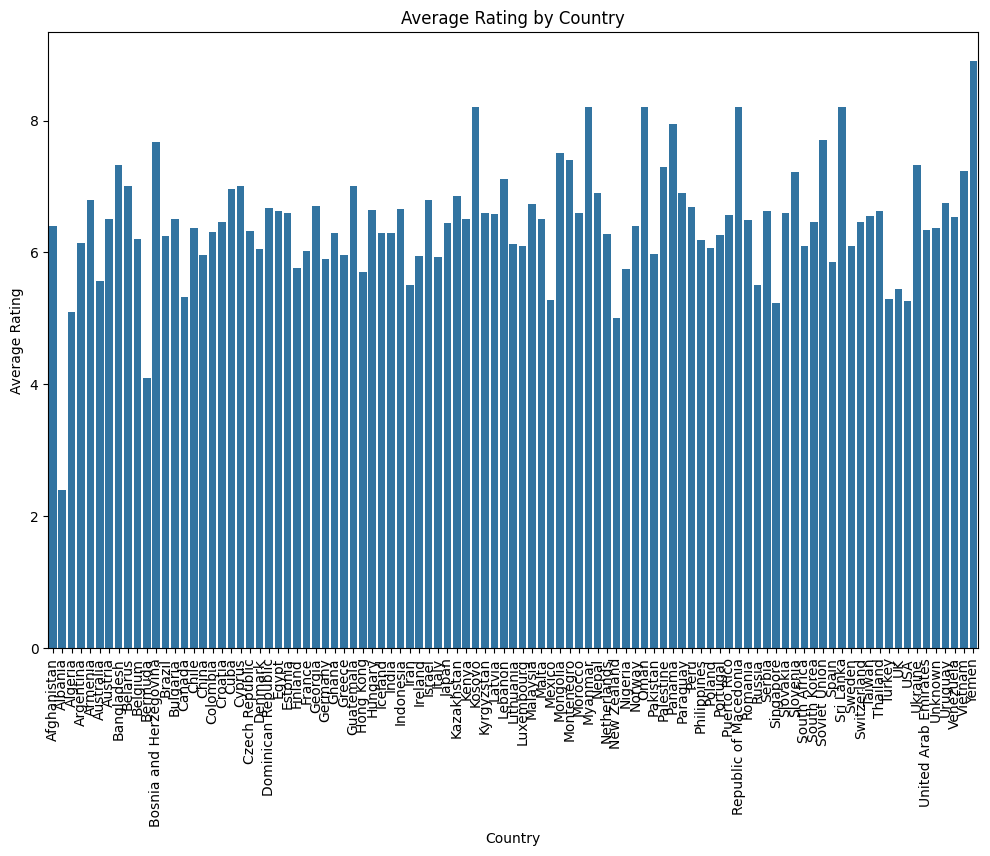

In [1918]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fill None values with 'Unknown'
movie_with_ratings_and_genres_and_roles_df['country'] = movie_with_ratings_and_genres_and_roles_df['country'].fillna('Unknown')

# Preprocessing: Convert 'country' to the first listed country for simplicity
movie_with_ratings_and_genres_and_roles_df['country'] = movie_with_ratings_and_genres_and_roles_df['country'].apply(lambda x: x.split(',')[0])

avg_rating_by_country = movie_with_ratings_and_genres_and_roles_df.groupby('country')['avg_rating'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_rating_by_country, x='country', y='avg_rating')
plt.title('Average Rating by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


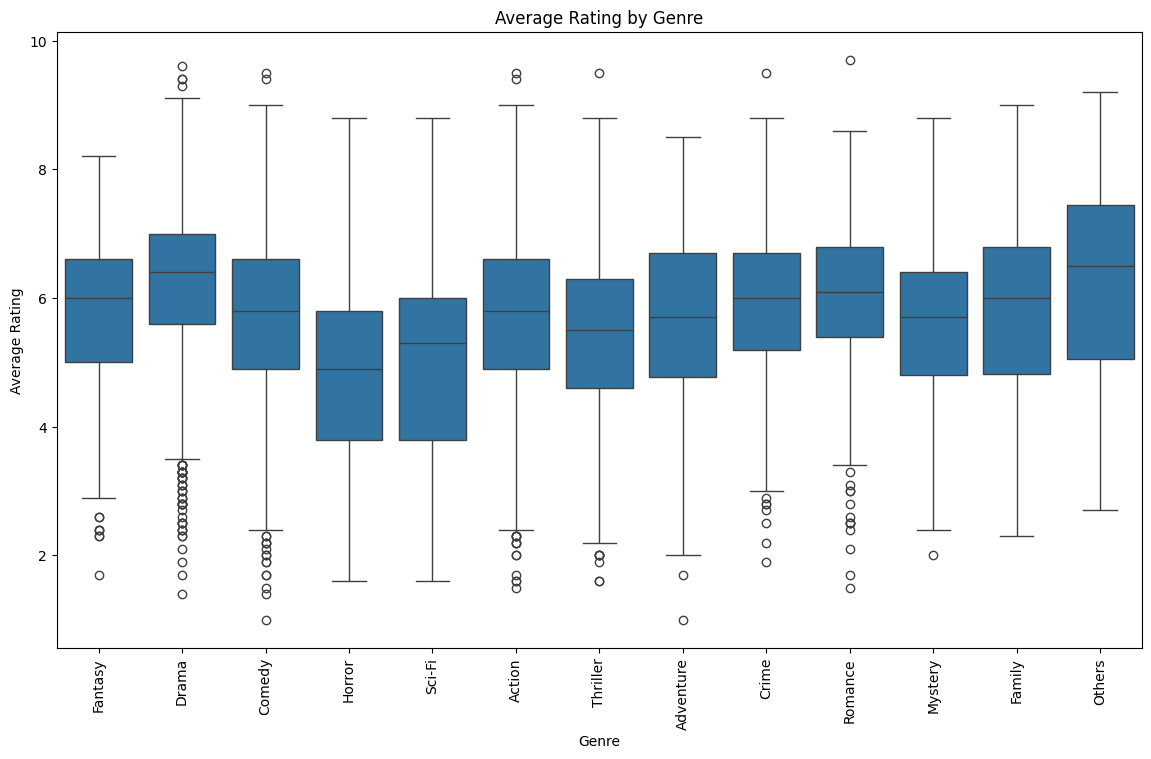

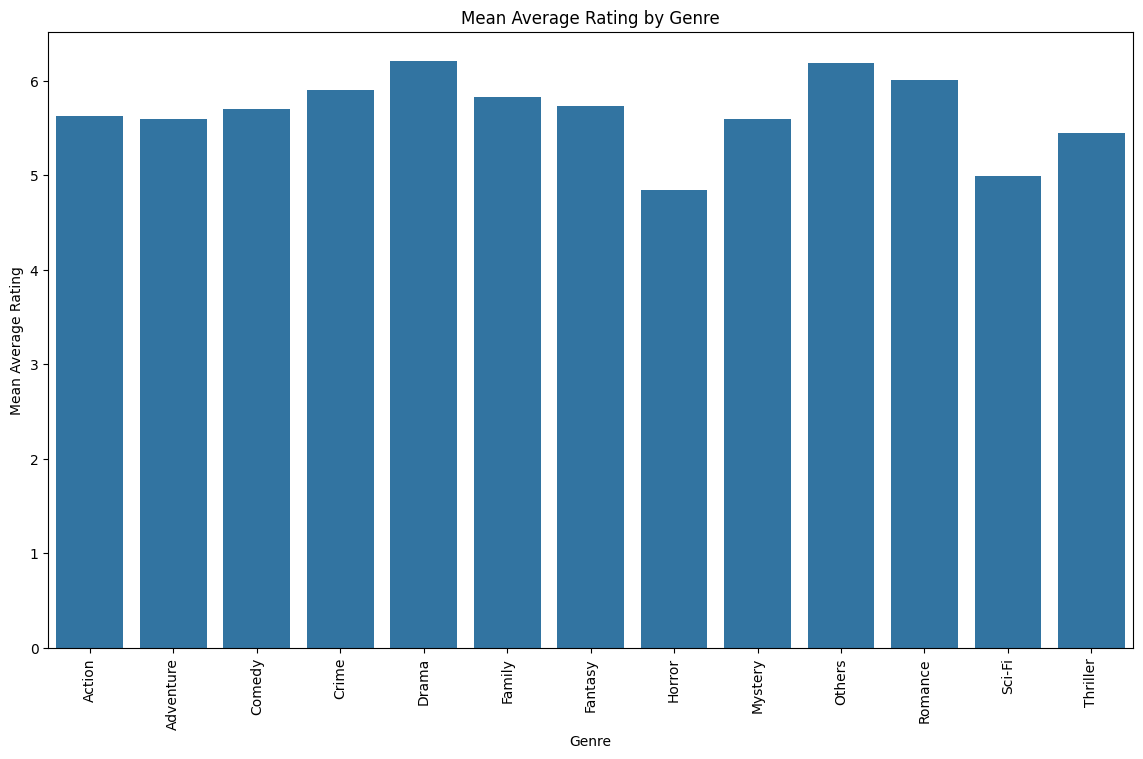

In [1919]:
# Preprocess: Explode the list of genres into separate rows
genres_exploded = movie_with_ratings_and_genres_and_roles_df.explode('genre')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.boxplot(data=genres_exploded, x='genre', y='avg_rating')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

# Calculate the mean average rating for each genre
mean_ratings_by_genre = genres_exploded.groupby('genre')['avg_rating'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=mean_ratings_by_genre, x='genre', y='avg_rating')
plt.title('Mean Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Average Rating')
plt.xticks(rotation=90)
plt.show()


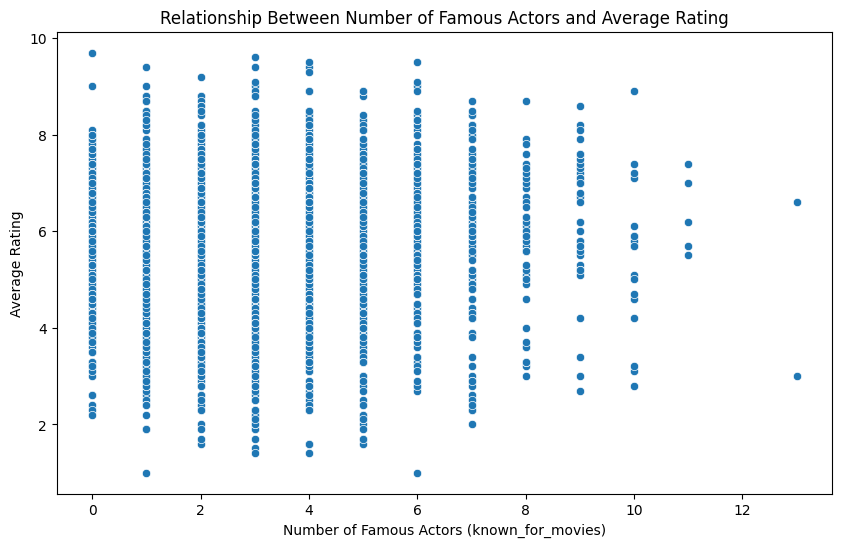

In [1920]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_with_ratings_and_genres_and_roles_df, x='known_for_movies', y='avg_rating')
plt.title('Relationship Between Number of Famous Actors and Average Rating')
plt.xlabel('Number of Famous Actors (known_for_movies)')
plt.ylabel('Average Rating')
plt.show()


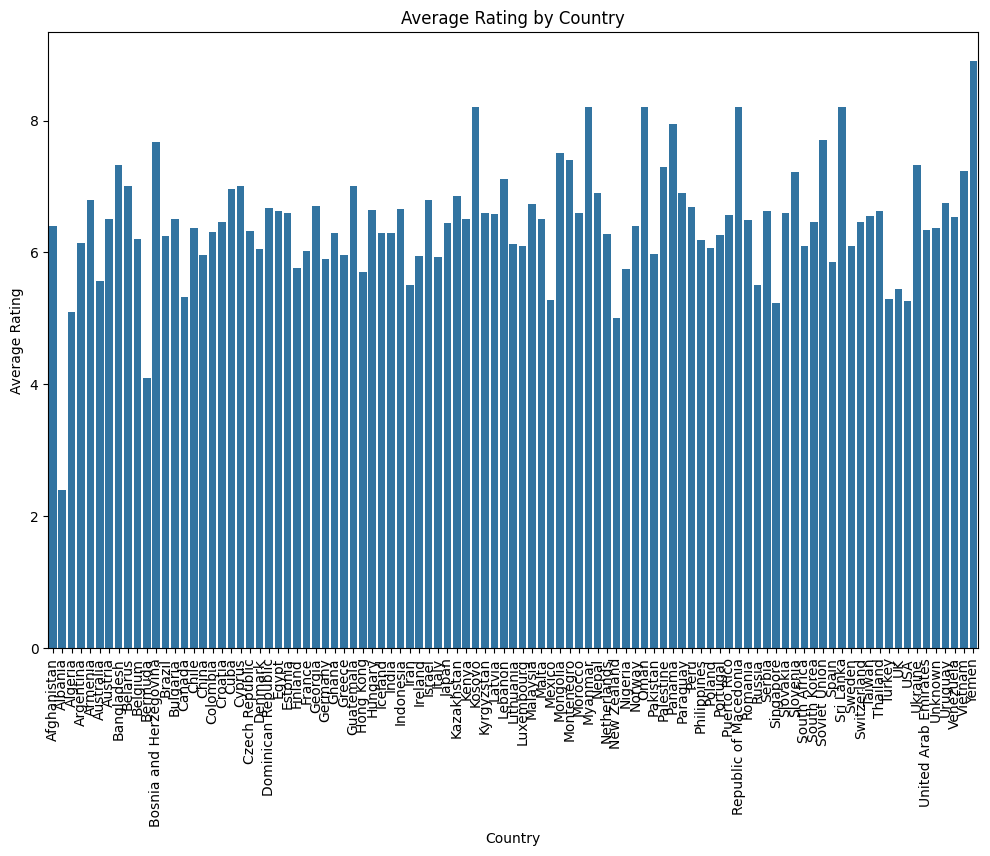

In [1921]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing: Convert 'country' to the first listed country for simplicity
movie_with_ratings_and_genres_and_roles_df['country'] = movie_with_ratings_and_genres_and_roles_df['country'].apply(lambda x: x.split(',')[0])

avg_rating_by_country = movie_with_ratings_and_genres_and_roles_df.groupby('country')['avg_rating'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_rating_by_country, x='country', y='avg_rating')
plt.title('Average Rating by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [1922]:
movie_with_ratings_and_genres_and_roles_df

,id,duration,country,avg_rating,genre,known_for_movies
0,tt0038733,104,UK,8.1,"[Fantasy, Drama, Comedy]",1
1,tt0060908,102,France,7.5,"[Comedy, Drama]",0
2,tt0069049,122,France,6.9,[Drama],2
3,tt0082620,92,USA,3.6,[Horror],0
4,tt0083907,85,USA,7.5,[Horror],4
...,...,...,...,...,...,...
3752,tt9866208,78,Canada,3.6,[Others],1
3753,tt9866700,92,USA,3.7,"[Thriller, Horror]",1
3754,tt9894394,100,Malaysia,8.0,[Others],0
3755,tt9899880,82,Iran,4.0,"[Drama, Comedy]",4


In [1923]:
# using label encoder on the country column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

movie_with_ratings_and_genres_and_roles_df['country'] = label_encoder.fit_transform(movie_with_ratings_and_genres_and_roles_df['country'])
movie_with_ratings_and_genres_and_roles_df

,id,duration,country,avg_rating,genre,known_for_movies
0,tt0038733,104,90,8.1,"[Fantasy, Drama, Comedy]",1
1,tt0060908,102,27,7.5,"[Comedy, Drama]",0
2,tt0069049,122,27,6.9,[Drama],2
3,tt0082620,92,91,3.6,[Horror],0
4,tt0083907,85,91,7.5,[Horror],4
...,...,...,...,...,...,...
3752,tt9866208,78,14,3.6,[Others],1
3753,tt9866700,92,91,3.7,"[Thriller, Horror]",1
3754,tt9894394,100,51,8.0,[Others],0
3755,tt9899880,82,38,4.0,"[Drama, Comedy]",4


In [1924]:
# retorna todas as linhs somente da coluna de indice 1 do X_census
y_imdb = movie_with_ratings_and_genres_and_roles_df.iloc[:, 3]
y_imdb

0       8.1
1       7.5
2       6.9
3       3.6
4       7.5
       ... 
3752    3.6
3753    3.7
3754    8.0
3755    4.0
3756    7.2
Name: avg_rating, Length: 3757, dtype: float64

### Escalonamento dos valores

In [1925]:
from sklearn.preprocessing import OneHotEncoder

# Step 1: Explode the genre lists into individual rows
df_exploded = movie_with_ratings_and_genres_and_roles_df.explode('genre')

# Step 2: Apply one-hot encoding to the exploded genre column
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot = encoder.fit_transform(df_exploded[['genre']])

# Convert one-hot encoding to DataFrame and concatenate with the original DataFrame
one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['genre']))
df_exploded = df_exploded.reset_index(drop=True)
df_encoded = pd.concat([df_exploded, one_hot_df], axis=1).drop(['genre'], axis=1)

# Aggregate the one-hot encoded columns back to the original DataFrame
movie_with_ratings_and_genres_and_roles_df = df_encoded.groupby('id').sum().reset_index()


movie_with_ratings_and_genres_and_roles_df = movie_with_ratings_and_genres_and_roles_df.drop(columns=["id"])
movie_with_ratings_and_genres_and_roles_df = movie_with_ratings_and_genres_and_roles_df.to_numpy()

movie_with_ratings_and_genres_and_roles_df

array([[312. , 270. ,  24.3, ...,   0. ,   0. ,   0. ],
       [204. ,  54. ,  15. , ...,   0. ,   0. ,   0. ],
       [122. ,  27. ,   6.9, ...,   0. ,   0. ,   0. ],
       ...,
       [100. ,  51. ,   8. , ...,   0. ,   0. ,   0. ],
       [164. ,  76. ,   8. , ...,   0. ,   0. ,   0. ],
       [212. ,  72. ,  14.4, ...,   0. ,   0. ,   1. ]])

In [ ]:
# realizamos o escalonamento dos valores, conforme fizemos no dataset 1
from sklearn.preprocessing import StandardScaler

scaler_imdb = StandardScaler()
x_imdb = scaler_imdb.fit_transform(movie_with_ratings_and_genres_and_roles_df)
x_imdb

array([[ 1.23268199,  1.94245365,  2.66265208, ..., -0.35666892,
        -0.22497825, -0.47220946],
       [ 0.11901698, -0.72333212,  0.8529327 , ..., -0.35666892,
        -0.22497825, -0.47220946],
       [-0.72654348, -1.05655534, -0.7232745 , ..., -0.35666892,
        -0.22497825, -0.47220946],
       ...,
       [-0.95340117, -0.76035693, -0.50922167, ..., -0.35666892,
        -0.22497825, -0.47220946],
       [-0.29345153, -0.45181691, -0.50922167, ..., -0.35666892,
        -0.22497825, -0.47220946],
       [ 0.20151069, -0.50118331,  0.73617661, ..., -0.35666892,
        -0.22497825,  2.11770431]])

### Divisão das bases em treino e teste

In [ ]:
# dividimos o dataset em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

# como já haviamos dividido o dataset em X (previsores) e y (classe),
# agora teremos a mesma subdivisão só com conjuntos de treino e teste para cada caso
X_census_treino, X_census_teste, y_census_treino, y_census_teste = train_test_split(x_imdb, y_imdb, test_size=0.2, random_state=0)